In [36]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
orders = pd.read_excel('superstore_sales.xlsx', sheet_name="Orders")
people = pd.read_excel('superstore_sales.xlsx', sheet_name="People")
returns = pd.read_excel('superstore_sales.xlsx', sheet_name="Returns")

In [38]:
df = orders.copy()

In [39]:
df.head(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011


In [40]:
df.shape

(51290, 21)

In [41]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [42]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [43]:
print(len(pd.unique(df['product_name'])))

3788


In [44]:
filtered = df.copy()
diff_date = (df['ship_date'] - df['order_date'])/ np.timedelta64(1, 'D')

In [45]:
filtered['diff_date'] = diff_date

In [46]:
filt = filtered.pop('diff_date')
filtered.insert(3, 'diff_date', filt)

In [47]:
filtered.head(3)

,order_id,order_date,ship_date,diff_date,ship_mode,customer_name,segment,state,country,market,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,5.0,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,7.0,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,4.0,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011


In [48]:
filtered['month'] = pd.DatetimeIndex(filtered['order_date']).month 
filtered['month'] = filtered.month.apply(lambda x : str(int(x)).zfill(2))

In [49]:
filtered.head(2)

,order_id,order_date,ship_date,diff_date,ship_mode,customer_name,segment,state,country,market,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,5.0,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,01
1,IN-2011-47883,2011-01-01,2011-01-08,7.0,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,01


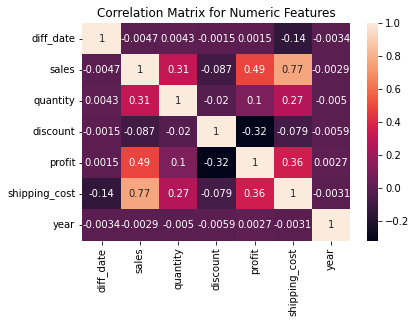

In [50]:
correlation_matrix = filtered.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

1. **PRODUCT**

TOP TEN MOST SOLD PRODUCTS

In [51]:
# MSP = MOST SOLD PRODUCTS
msp = filtered.groupby('product_name').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)
topten = msp.head(10)
topten

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


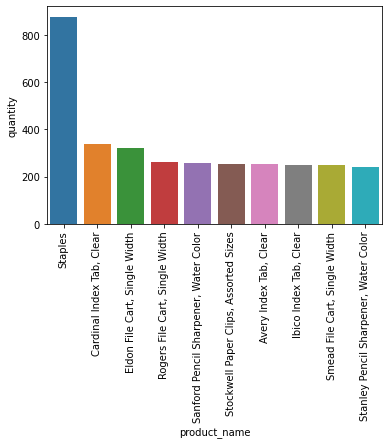

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Cardinal Index Tab, Clear'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Rogers File Cart, Single Width'),
  Text(4, 0, 'Sanford Pencil Sharpener, Water Color'),
  Text(5, 0, 'Stockwell Paper Clips, Assorted Sizes'),
  Text(6, 0, 'Avery Index Tab, Clear'),
  Text(7, 0, 'Ibico Index Tab, Clear'),
  Text(8, 0, 'Smead File Cart, Single Width'),
  Text(9, 0, 'Stanley Pencil Sharpener, Water Color')])

In [52]:
sns.barplot(x = 'product_name', y = 'quantity', data = topten.reset_index() )
plt.xticks(rotation = "vertical")

In [53]:
# Most profitable product
mpp = filtered.groupby('product_name').agg({'profit': 'sum'}).sort_values('profit', ascending=False).head(10)
mpp

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


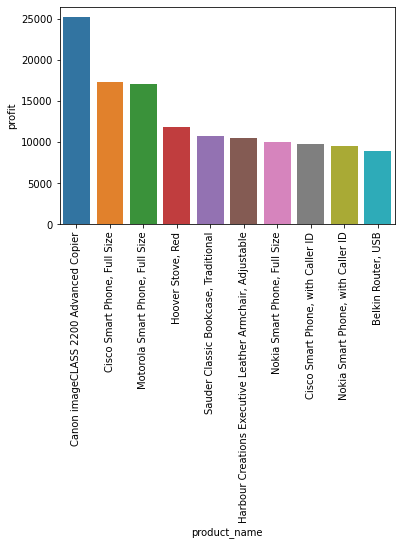

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Hoover Stove, Red'),
  Text(4, 0, 'Sauder Classic Bookcase, Traditional'),
  Text(5, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Cisco Smart Phone, with Caller ID'),
  Text(8, 0, 'Nokia Smart Phone, with Caller ID'),
  Text(9, 0, 'Belkin Router, USB')])

In [54]:
sns.barplot(x = 'product_name', y = 'profit', data = mpp.reset_index() )
plt.xticks(rotation = "vertical")

2. **SEGMENT**

In [55]:
# Mss = Most sold segment

mss = filtered.groupby('segment').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head(10)
mss

,quantity
segment,
Consumer,92157
Corporate,53565
Home Office,32590


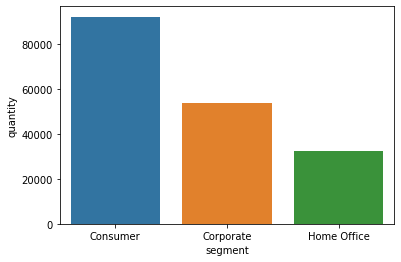

(array([0, 1, 2]),
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

In [56]:
sns.barplot(x = 'segment', y = 'quantity', data = mss.reset_index() )
plt.xticks(rotation = "horizontal")

In [57]:
# MPS = Most profitable segment
mps = filtered.groupby('segment').agg({'profit': 'sum'}).sort_values('profit', ascending=False).head(10)
mps

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


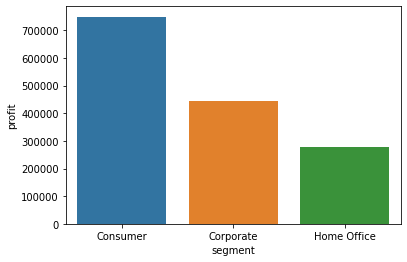

(array([0, 1, 2]),
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

In [58]:
sns.barplot(x = 'segment', y = 'profit', data = mps.reset_index() )
plt.xticks(rotation = "horizontal")

In [59]:
# SCS = average Shipping Cost per Segment

scs = filtered.groupby('segment').agg({'shipping_cost': 'mean'}).sort_values('shipping_cost', ascending=False).head(10)
scs

,shipping_cost
segment,
Corporate,26.603987
Consumer,26.295276
Home Office,26.227622


In [60]:
# SCS = Average Delivery time per Segment

ads = filtered.groupby('segment').agg({'diff_date': 'mean'}).sort_values('diff_date', ascending=False).round(2).head(10)
ads

,diff_date
segment,
Corporate,3.99
Home Office,3.97
Consumer,3.95


3. **SHIP MODE**

In [61]:
# Most used Ship Mode

scs = filtered.groupby('ship_mode').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head(10)
scs

,quantity
ship_mode,
Standard Class,107319
Second Class,35724
First Class,26039
Same Day,9230


In [62]:
# Costliest ship mode

csm = filtered.groupby('ship_mode').agg({'shipping_cost': 'sum'}).sort_values('shipping_cost', ascending=False).round(2).head(10)
csm

,shipping_cost
ship_mode,
Standard Class,614627.66
Second Class,314111.79
First Class,308102.54
Same Day,115973.72


In [63]:
# Ship Cost and Quantity
scq = pd.merge(scs, csm, on='ship_mode')
scq

,quantity,shipping_cost
ship_mode,,
Standard Class,107319,614627.66
Second Class,35724,314111.79
First Class,26039,308102.54
Same Day,9230,115973.72


In [64]:
scq['average'] = scq['shipping_cost'] / scq['quantity']
scq.round(2)

,quantity,shipping_cost,average
ship_mode,,,
Standard Class,107319,614627.66,5.73
Second Class,35724,314111.79,8.79
First Class,26039,308102.54,11.83
Same Day,9230,115973.72,12.56


In [65]:
ssqsc = filtered.groupby(['segment', 'ship_mode'])['quantity'].aggregate(['sum','count'])
ssqsc

sum  count
segment     ship_mode                   
Consumer    First Class     13595   3918
            Same Day         4985   1467
            Second Class    18099   5257
            Standard Class  55478  15876
Corporate   First Class      7781   2245
            Same Day         2515    728
            Second Class    11215   3198
            Standard Class  32054   9258
Home Office First Class      4663   1342
            Same Day         1730    506
            Second Class     6410   1854
            Standard Class  19787   5641

4. **REGION**

In [66]:
# Region with the Most Purchases
rmp = filtered.groupby('region').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head(10)
rmp

,quantity
region,
Central,41762
South,25206
North,18021
Oceania,12838
West,12266
Southeast Asia,11822
EMEA,11517
East,10618
Africa,10564


In [67]:
rsqsc = filtered.groupby(['region', 'ship_mode'])['quantity'].aggregate(['sum','count'])

In [68]:
rsqsc

sum  count
region         ship_mode                   
Africa         First Class      1585    679
               Same Day          595    257
               Second Class     2249    992
               Standard Class   6135   2659
Canada         First Class       139     70
               Same Day           70     29
               Second Class      200     91
               Standard Class    424    194
Caribbean      First Class       894    231
               Same Day          319     85
               Second Class     1438    372
               Standard Class   3648   1002
Central        First Class      6062   1593
               Same Day         2049    568
               Second Class     8180   2176
               Standard Class  25471   6780
Central Asia   First Class       944    252
               Same Day          295     79
               Second Class     1690    440
               Standard Class   4786   1277
EMEA           First Class      1603    700
               Same Day          694    300
               Second Class     2263    993
               Standard Class   6957   3036
East           First Class      1805    490
               Same Day          573    155
               Second Class     2026    530
               Standard Class   6214   1673
North          First Class      2584    684
               Same Day          924    246
               Second Class     3605    954
               Standard Class  10908   2901
North Asia     First Class      1417    385
               Same Day          382    106
               Second Class     1739    470
               Standard Class   5313   1377
Oceania        First Class      1663    455
               Same Day          732    205
               Second Class     2807    779
               Standard Class   7636   2048
South          First Class      3594    958
               Same Day         1358    341
               Second Class     5217   1368
               Standard Class  15037   3978
Southeast Asia First Class      1847    493
               Same Day          568    145
               Second Class     2002    523
               Standard Class   7405   1968
West           First Class      1902    515
               Same Day          671    185
               Second Class     2308    621
               Standard Class   7385   1882

In [69]:
mpy = filtered.groupby('year').agg({'profit': 'sum'}).sort_values('year', ascending=False).head(10)
mpy

,profit
year,
2014,504165.97046
2013,408512.76018
2012,307415.27910
2011,248940.81154
